In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pygwalker as pyg

In [5]:
df = pd.read_csv(r'C:\Users\Batman\Downloads\diabetes.csv')

In [6]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
# Hay 8 variables independientes, y una con resultado dependiente. Lo primero va a ser limpiar y ver el tipo de valores que tenemos


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.isna().sum() # No tenemos ningun valor na

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

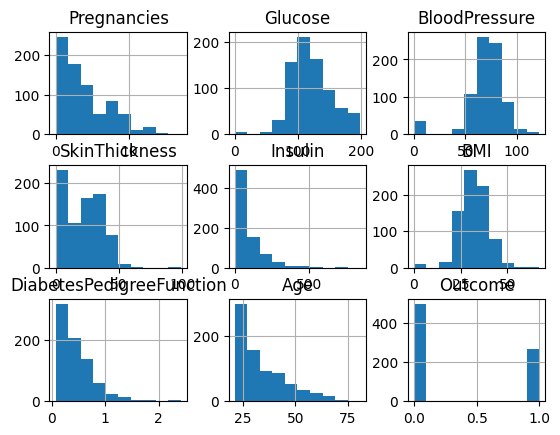

In [11]:
# Pasamos a hacer una visualizacion

df.hist()

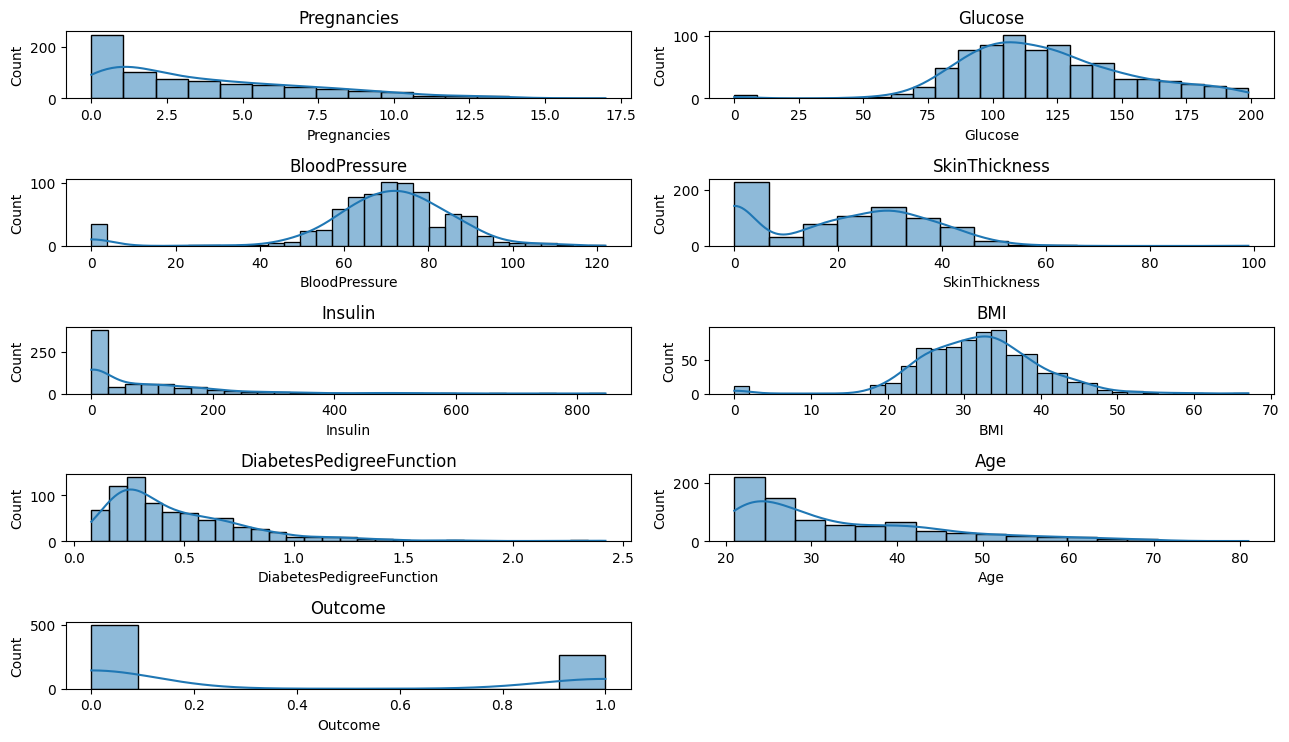

In [12]:
plt.figure(figsize=(13,13))
for i, column in enumerate(df.columns):
    plt.subplot(len(df.columns), 2, i+1)
    sns.histplot(df[column], kde=True)
    plt.title(column)
plt.tight_layout()

In [13]:
df.corr()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


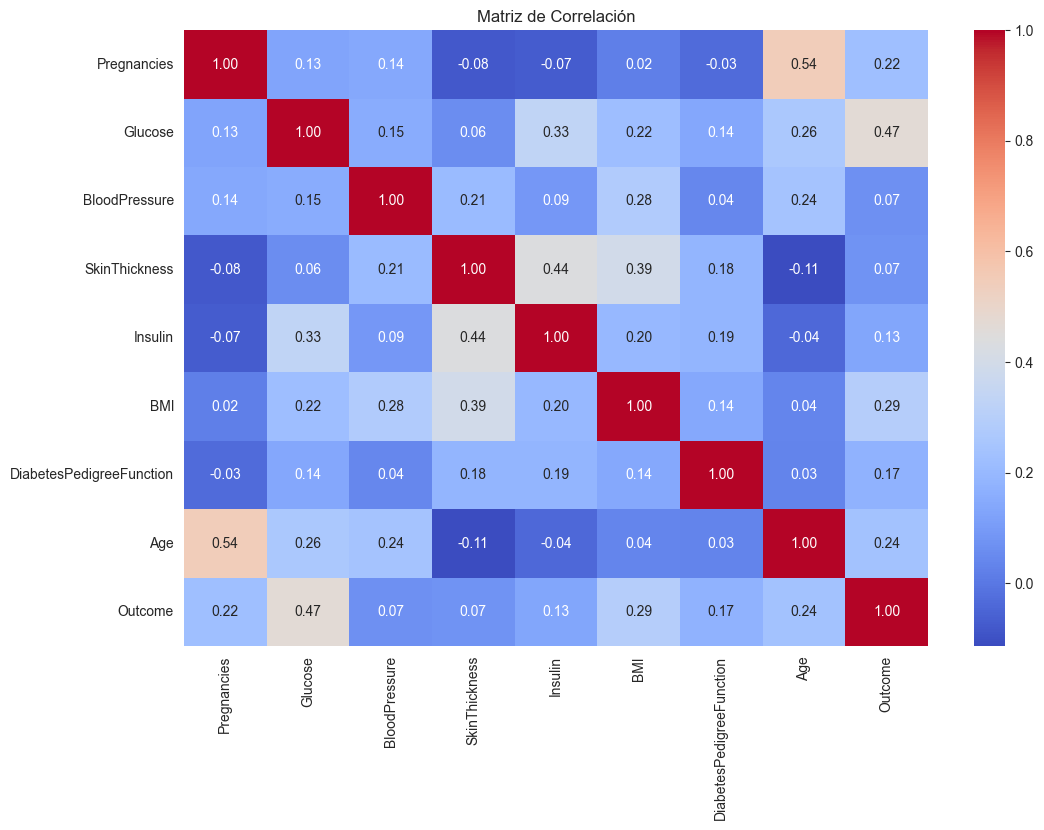

In [14]:
# Calcula la matriz de correlaciones
corr = df.corr()

# Configura el estilo de Seaborn
sns.set_style("whitegrid")

# Crea un mapa de calor para visualizar las correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Matriz de Correlación")
plt.show()


<Axes: >

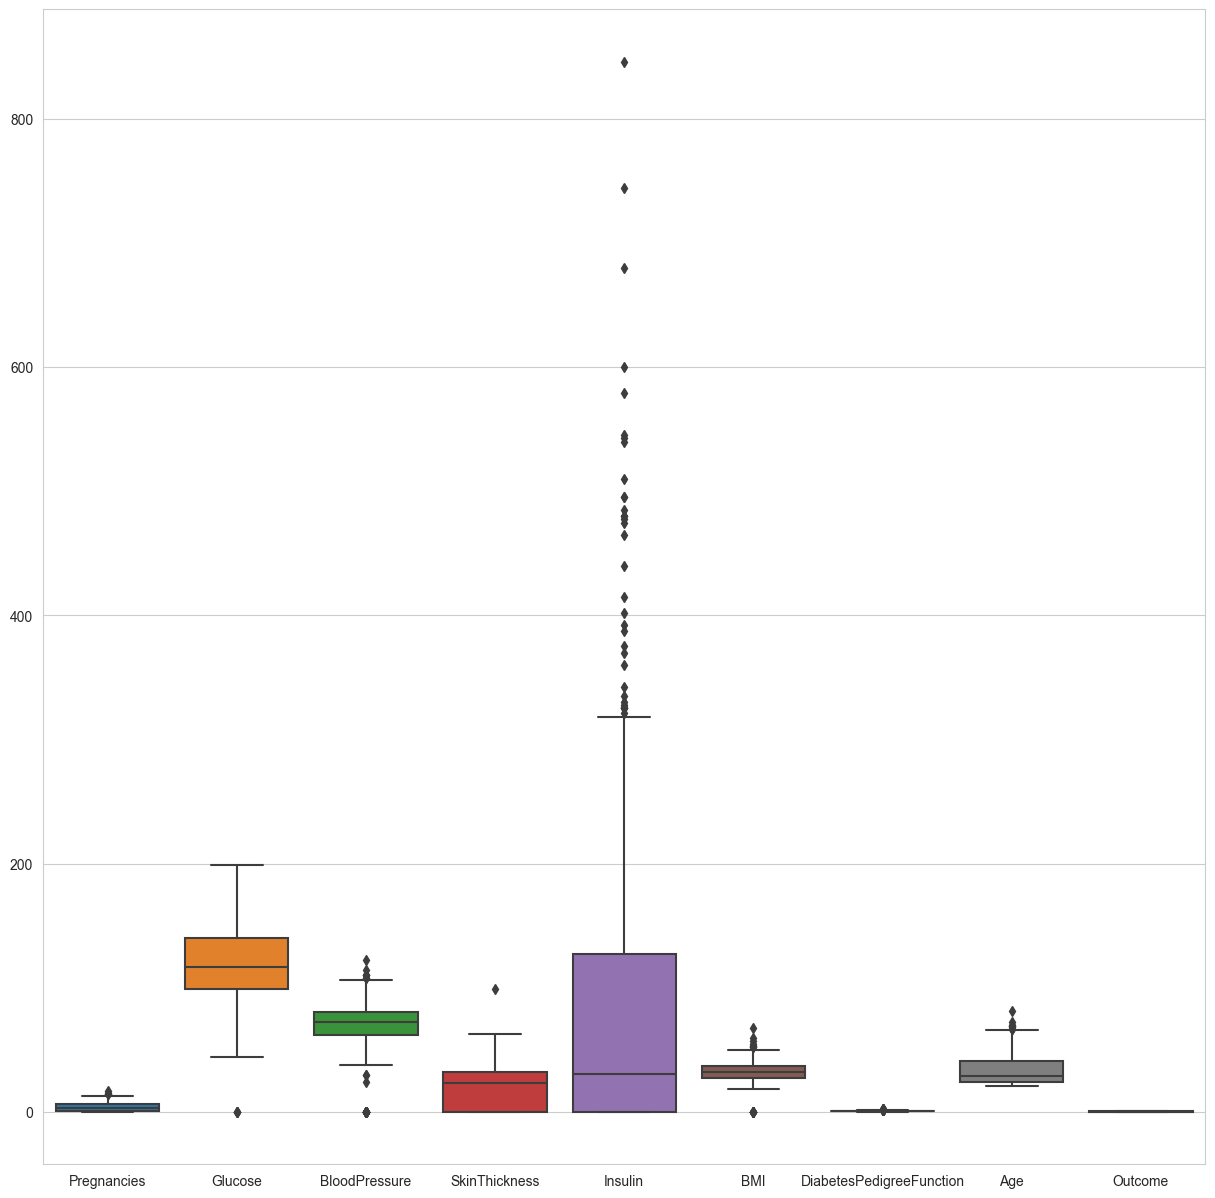

In [15]:
plt.figure(figsize=(15,15))
sns.boxplot(df)


In [16]:
pyg.walk(df, hideDataSourceConfig=True)

Box(children=(HTML(value='<div id="ifr-pyg-0" style="height: auto">\n    <head>\n        <meta http-equiv="Con…

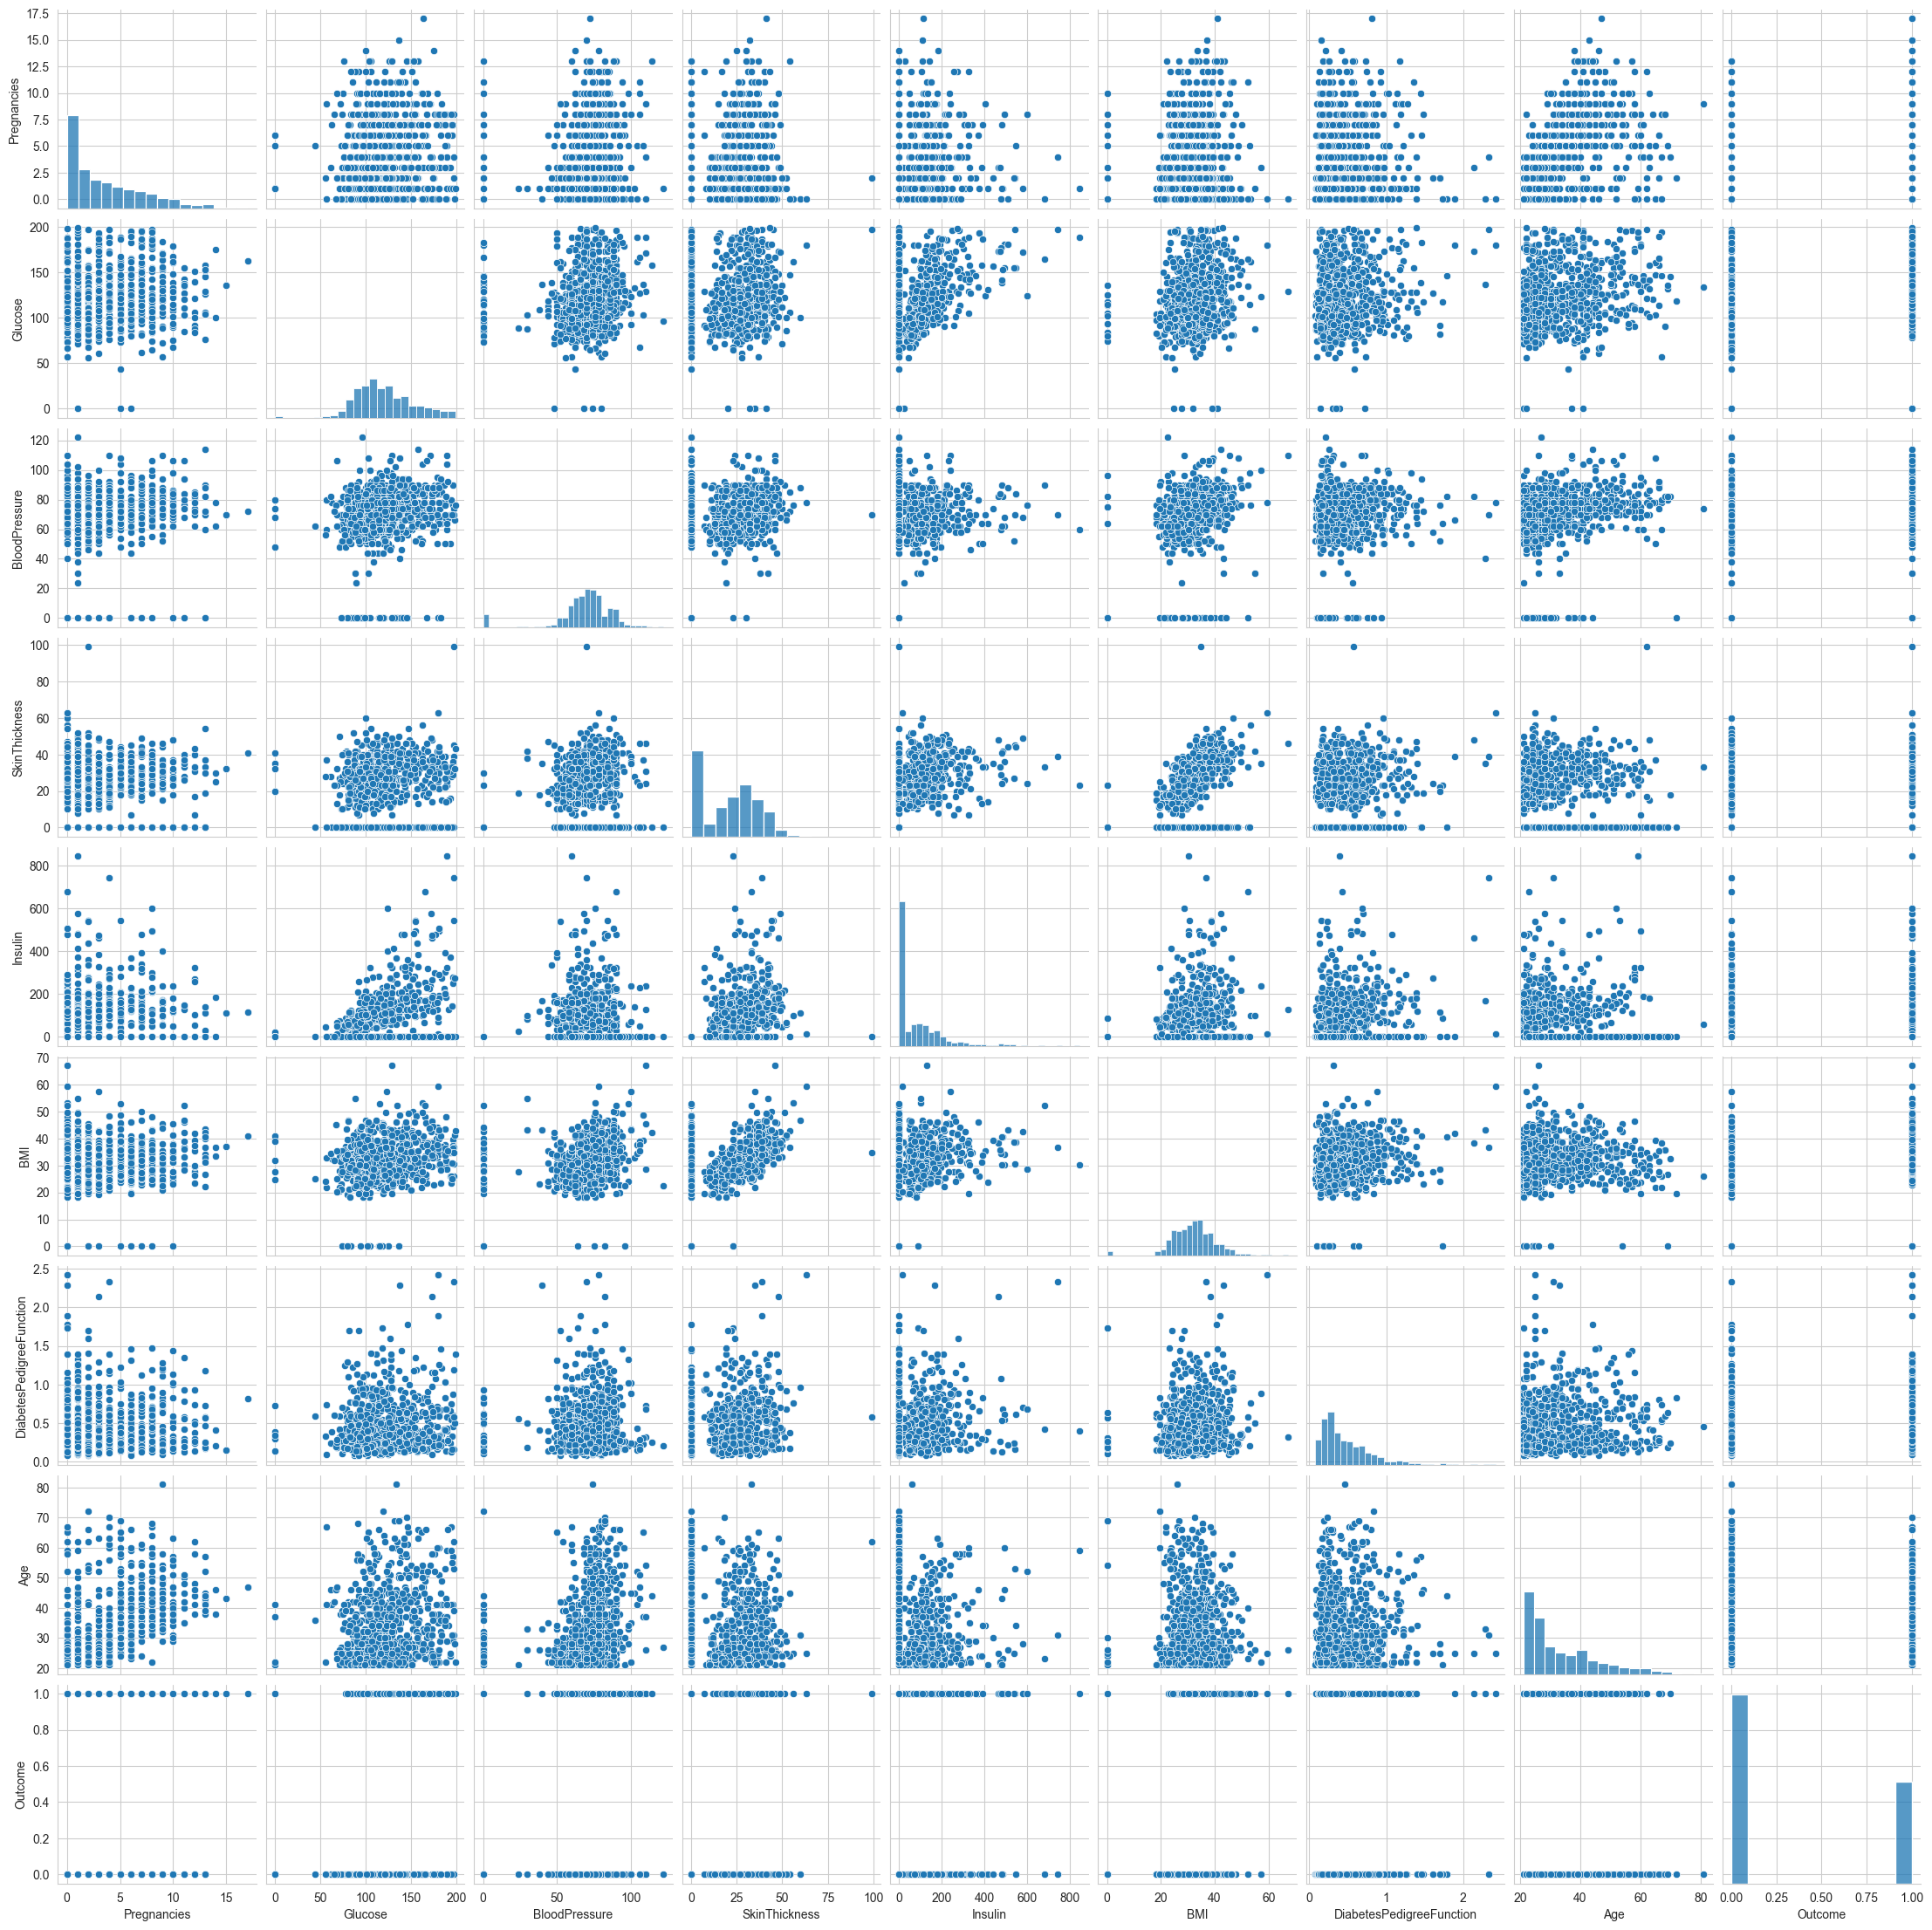

In [17]:
sns.pairplot(df)

<Axes: xlabel='Glucose', ylabel='BloodPressure'>

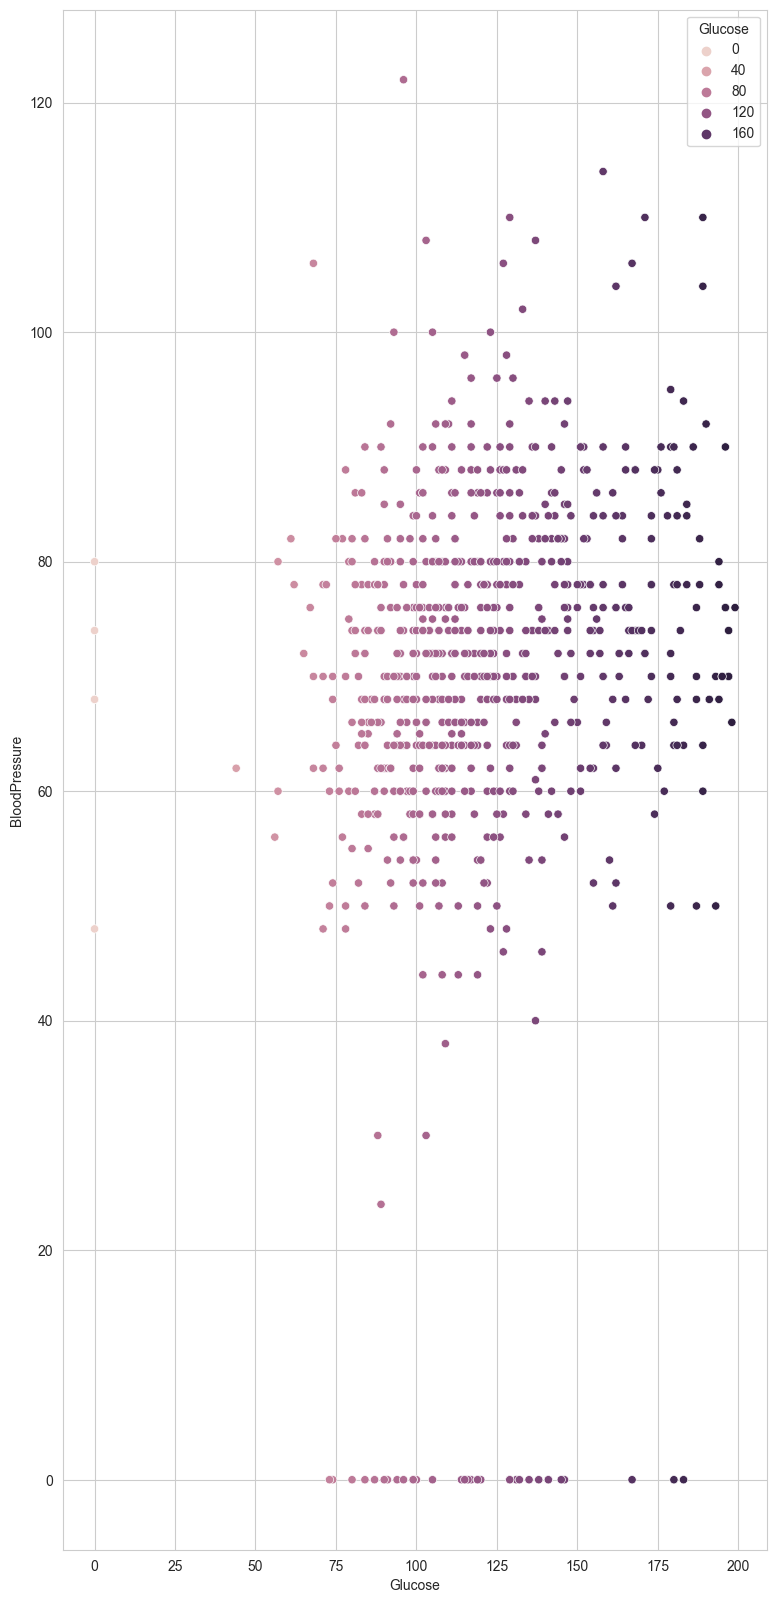

In [18]:
# Vamos a seleccionar específicamente 4 columnas. Glucosa, presión, Insulina, Diabetes y edad

plt.figure(figsize=(20,20))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Glucose', y='BloodPressure', data=df, hue='Glucose')

In [19]:
df_reducido1 = df[['Glucose', 'Age','BloodPressure','Insulin']]
df_reducido1.corr()

,Glucose,Age,BloodPressure,Insulin
Glucose,1.000000,0.263514,0.152590,0.331357
Age,0.263514,1.000000,0.239528,-0.042163
BloodPressure,0.152590,0.239528,1.000000,0.088933
Insulin,0.331357,-0.042163,0.088933,1.000000


In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

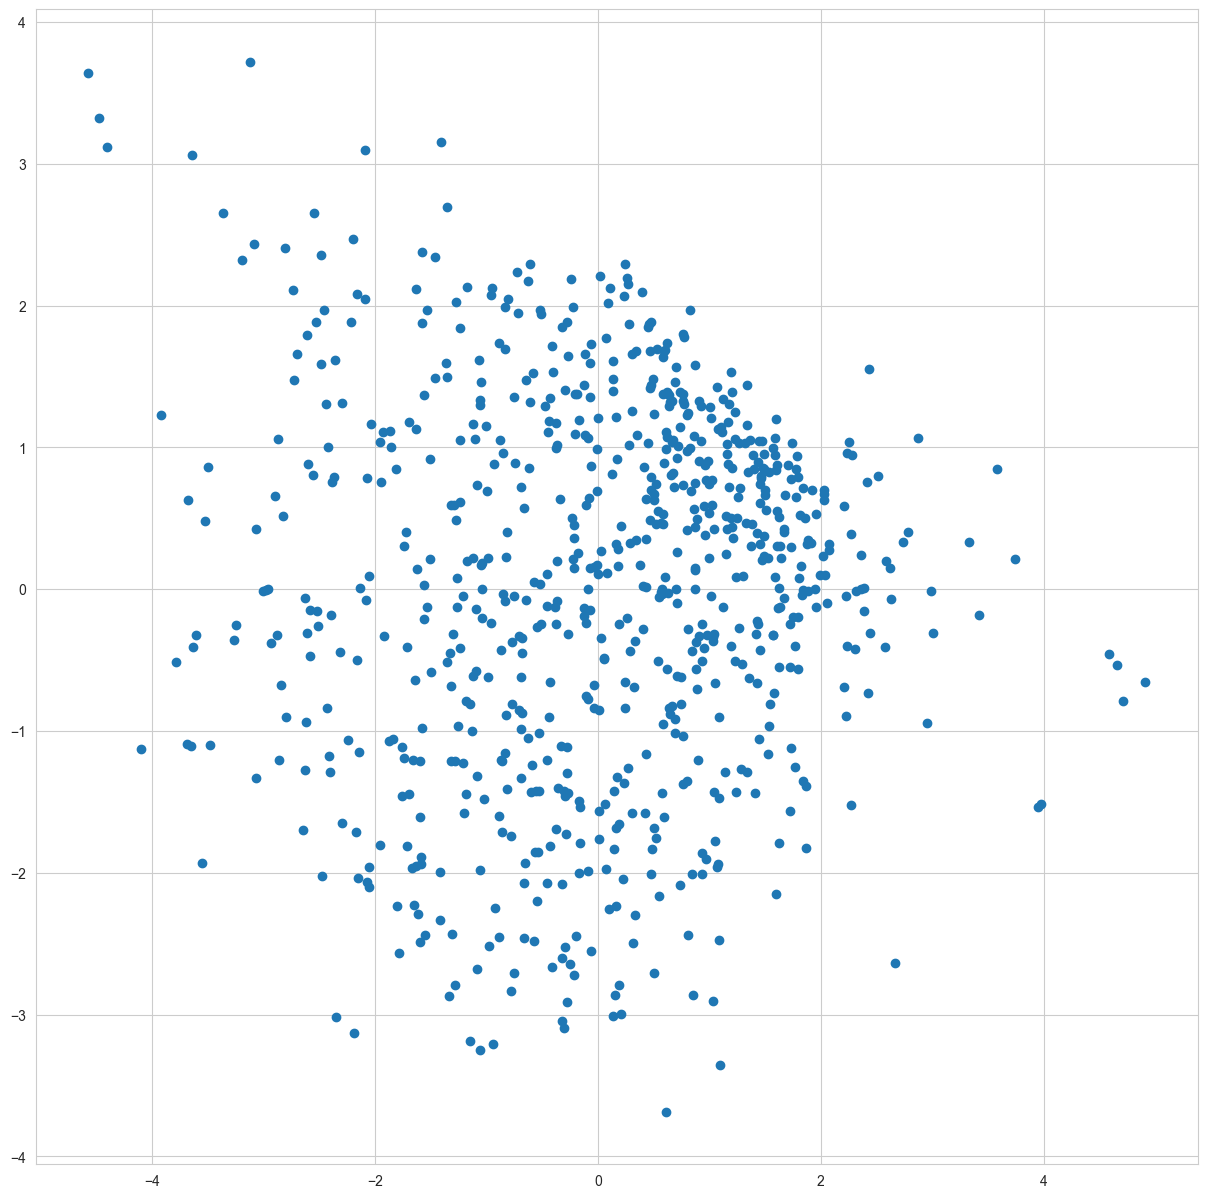

In [21]:
# Vamos a reducir el número de columnas, de forma que tengamos un 2D
scaler = StandardScaler()
df_escalado = scaler.fit_transform(df)
# Ahora vamos a reducir las filas, para tener una matriz cuadrada
pca = PCA(n_components=2)
componentes_principales = pca.fit_transform(df_escalado)
# Creamos un dataframe con los componentes principales
df_pca = pd.DataFrame(data= componentes_principales, columns=['Componente 1', 'Componente 2'])
# Por último sacamos la visualización

plt.figure(figsize=(15,15))
plt.scatter(df_pca['Componente 1'], df_pca['Componente 2'])
plt.show()


In [22]:
# Vamos a hacer un análisis de clústers, que agrupen los valores parejos


c:\Users\Batman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


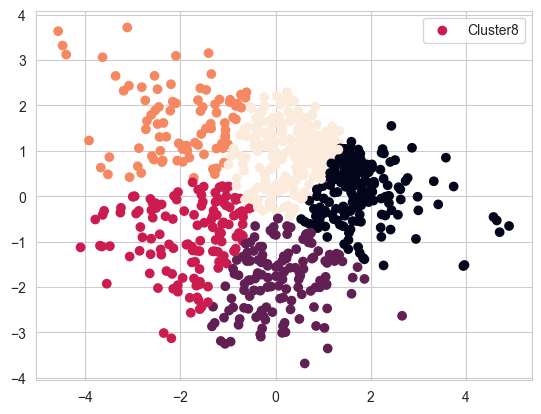

In [23]:
from cProfile import label
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
cluster_labels = kmeans.fit_predict(df_pca)
df_pca['Cluster'] = cluster_labels

plt.scatter(df_pca['Componente 1'], df_pca['Componente 2'],c=df_pca['Cluster'], label= f'Cluster{i}' )
plt.legend()


c:\Users\Batman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


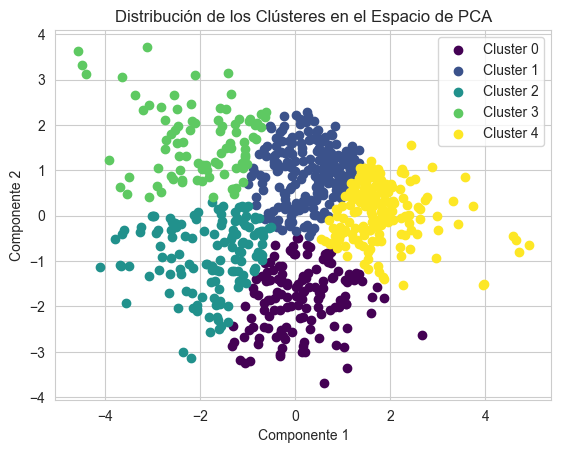

In [24]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Asumiendo que df_pca ya tiene las columnas 'Componente 1' y 'Componente 2'
# Aplicar KMeans
kmeans = KMeans(n_clusters=5)
cluster_labels = kmeans.fit_predict(df_pca[['Componente 1', 'Componente 2']])
df_pca['Cluster'] = cluster_labels

# Colores para cada clúster
colores = plt.cm.viridis(np.linspace(0, 1, 5))

# Crear el gráfico de dispersión
for i in range(5):
    cluster_data = df_pca[df_pca['Cluster'] == i]
    plt.scatter(cluster_data['Componente 1'], cluster_data['Componente 2'], color=colores[i], label=f'Cluster {i}')

# Añadir la leyenda
plt.legend()

# Añadir títulos y etiquetas a los ejes
plt.title('Distribución de los Clústeres en el Espacio de PCA')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')

# Mostrar el gráfico
plt.show()


In [25]:
# Agrega las etiquetas de clúster al DataFrame original
df['Cluster'] = cluster_labels

# Analizamos las estadísticas descriptivas para cada clúster
for i in range(kmeans.n_clusters):
    print(f"Estadísticas descriptivas para el Clúster {i}:")
    print(df[df['Cluster'] == i].describe())
    print("\n")

Estadísticas descriptivas para el Clúster 0:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin   
count   139.000000  139.000000      139.00000     139.000000  139.000000  \
mean      6.726619  123.352518       71.47482       5.172662    7.280576   
std       3.175554   28.436266       20.31824      10.741986   34.496383   
min       0.000000   57.000000        0.00000       0.000000    0.000000   
25%       5.000000  106.000000       68.00000       0.000000    0.000000   
50%       7.000000  122.000000       74.00000       0.000000    0.000000   
75%       9.000000  137.000000       80.00000       0.000000    0.000000   
max      13.000000  195.000000      106.00000      40.000000  326.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  Cluster  
count  139.000000                139.000000  139.000000  139.000000    139.0  
mean    29.582734                  0.375029   45.892086    0.395683      0.0  
std      7.025790                

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
# Outcome es nuestra variable objectivo, por lo que la sacamos
X = df.drop('Outcome', axis=1)
y = df['Outcome']
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)
# Normalizamos los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Crear y entrenar el modelo 
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [30]:
# Evaluar el modelo
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       150
           1       0.66      0.54      0.59        81

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.73      0.74      0.73       231

[[127  23]
 [ 37  44]]


In [31]:
# Debido a que los valores que tenemos no ofrecen una precisión mayor al 80%, vamos a intentar otras alternativas



In [38]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(random_state=9)
tree_model.fit(X_train, y_train)

# Evaluamos el modelo
y_pred_tree = tree_model.predict(X_test)
# Evaluar el modelo
print("Informe de clasificación:")
print(classification_report(y_test, y_pred_tree))

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_tree))

# En este caso vemos que los resultados son peores

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       150
           1       0.55      0.58      0.57        81

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231

Matriz de confusión:
[[112  38]
 [ 34  47]]


In [39]:
# Vamos a probar un tercer modelo

from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
#Evaluamos el modelo
print("Informe de clasificación para SVM:")
print(classification_report(y_test, y_pred_svm))

print("Matriz de confusión para SVM:")
print(confusion_matrix(y_test, y_pred_svm))
# En este caso hemos mejorado de alguna forma el modelo

Informe de clasificación para SVM:
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       150
           1       0.68      0.60      0.64        81

    accuracy                           0.76       231
   macro avg       0.74      0.73      0.73       231
weighted avg       0.76      0.76      0.76       231

Matriz de confusión para SVM:
[[127  23]
 [ 32  49]]


In [43]:
# Vamos ahora con un modelo de Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix



In [47]:
pip install xgboost


   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/99.8 MB 6.8 MB/s eta 0:00:15
   ---------------------------------------- 1.0/99.8 MB 12.7 MB/s eta 0:00:08
    --------------------------------------- 2.5/99.8 MB 19.8 MB/s eta 0:00:05
   - -------------------------------------- 3.4/99.8 MB 21.6 MB/s eta 0:00:05
   - -------------------------------------- 4.9/99.8 MB 24.0 MB/s eta 0:00:04
   -- ------------------------------------- 6.0/99.8 MB 25.6 MB/s eta 0:00:04
   -- ------------------------------------- 7.2/99.8 MB 25.5 MB/s eta 0:00:04
   --- ------------------------------------ 8.2/99.8 MB 26.0 MB/s eta 0:00:04
   --- ------------------------------------ 9.5/99.8 MB 27.7 MB/s eta 0:00:04
   ---- ----------------------------------- 10.8/99.8 MB 31.2 MB/s eta 0:00:03
   ---- ----------------------------------- 12.0/99.8 MB 32.8 MB/s eta 0:00:03
   ----- ---------------------------------- 13.3/99.8 MB 31.2 MB/s eta

In [48]:
from xgboost import XGBClassifier


# Crear y entrenar el modelo XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_xgb = xgb_model.predict(X_test)

# Evaluar el modelo
print("Informe de clasificación para XGBoost:")
print(classification_report(y_test, y_pred_xgb))

print("Matriz de confusión para XGBoost:")
print(confusion_matrix(y_test, y_pred_xgb))

# Vemos que el modelo XGBoost nos da los mejores datos



Informe de clasificación para XGBoost:
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       150
           1       0.71      0.72      0.71        81

    accuracy                           0.80       231
   macro avg       0.78      0.78      0.78       231
weighted avg       0.80      0.80      0.80       231

Matriz de confusión para XGBoost:
[[126  24]
 [ 23  58]]


In [49]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Crear y entrenar el modelo SVM con un kernel RBF, por ejemplo
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_svm = svm_model.predict(X_test)

# Evaluar el modelo
print("Informe de clasificación para SVM con kernel RBF:")
print(classification_report(y_test, y_pred_svm))

print("Matriz de confusión para SVM con kernel RBF:")
print(confusion_matrix(y_test, y_pred_svm))


Informe de clasificación para SVM con kernel RBF:
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       150
           1       0.68      0.60      0.64        81

    accuracy                           0.76       231
   macro avg       0.74      0.73      0.73       231
weighted avg       0.76      0.76      0.76       231

Matriz de confusión para SVM con kernel RBF:
[[127  23]
 [ 32  49]]


In [50]:
from sklearn.model_selection import GridSearchCV

# Parámetros para la búsqueda en cuadrícula
parametros = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

# Búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(SVC(), parametros, refit=True, verbose=2)
grid_search.fit(X_train, y_train)

# Mejores parámetros y modelo
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)

# Evaluar el modelo
y_pred_opt = grid_search.predict(X_test)
print("Informe de clasificación para SVM optimizado:")
print(classification_report(y_test, y_pred_opt))
print("Matriz de confusión para SVM optimizado:")
print(confusion_matrix(y_test, y_pred_opt))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

In [53]:
# Al finalmente usar un modelo XGBoost, por ser el que mejores datos nos termina proporcionando, vamos a hacer una validación cruzada para entender mejor si estamos en el camino correcto.
# Al ya tener el modelo creado, únicamente vamos a aplicar la validación cruzada

from sklearn.model_selection import cross_val_score


scores = cross_val_score(xgb_model, X, y, cv=5,scoring='accuracy')
print("Precisión en cada pliegue: ", scores)
print("Precisión media: ", np.mean(scores))



Precisión en cada pliegue:  [0.81818182 0.75974026 0.78571429 0.81699346 0.81699346]
Precisión media:  0.7995246583481878


In [54]:
# Vamos a obtener una evaluación adicional con otra métrica; en este caso el AUC-ROC
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict
# Usamos la predicción con validación cruzada
y_pred_cv = cross_val_predict(xgb_model, X, y, cv=5)
# Informe de clasificación
print("Informe de clasificación:")
print(classification_report(y, y_pred_cv))

# Calcular AUC-ROC
auc_roc = roc_auc_score(y, y_pred_cv)
print("AUC-ROC:", auc_roc)


Informe de clasificación:
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       500
           1       0.71      0.73      0.72       268

    accuracy                           0.80       768
   macro avg       0.78      0.78      0.78       768
weighted avg       0.80      0.80      0.80       768

AUC-ROC: 0.7828059701492538


In [ ]:
# El valor es un 1% inferior al anterior

In [55]:
from sklearn.model_selection import GridSearchCV

# Definir los parámetros para la búsqueda en cuadrícula
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1]
}

# Crear la búsqueda en cuadrícula
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X, y)

# Mejores parámetros
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0